In [89]:
'''This is a playground with data from https://www.kaggle.com/miroslavsabo/paintings
'''

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paintings/paintings.csv


Load Data

In [90]:
people_file_location = 'paintings.csv'

In [91]:
# read data from csv file to dataframe
row_data = pd.read_csv('../input/paintings/paintings.csv')

In [92]:
# print data info
print(row_data.shape)
print(row_data.columns)

(39, 51)
Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31',
       'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41',
       'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'art movement',
       'artist', 'painting'],
      dtype='object')


In [93]:
print(row_data.head())

   S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  ...  S42  S43  S44  S45  S46  S47  \
0   3   2   3   1   1   1   2   2   3    1  ...    2    1    2    2    4    2   
1   2   2   2   4   1   1   2   3   4    3  ...    4    4    1    4    2    2   
2   1   3   3   1   1   1   5   2   1    2  ...    1    1    1    4    3    1   
3   5   3   1   1   1   1   3   3   1    1  ...    2    3    1    1    3    2   
4   2   2   2   1   1   1   1   2   1    1  ...    1    1    2    1    4    2   

   S48  art movement             artist             painting  
0    2   Renaissance  Sandro Botticelli   The Birth of Venus  
1    1   Renaissance  Leonardo da Vinci  Lady with an Ermine  
2    3   Renaissance            Raphael         Three Graces  
3    5       Baroque         Caravaggio           Entombment  
4    4       Baroque    Diego Velazquez         Rokeby Venus  

[5 rows x 51 columns]


Improve data

In [94]:
# Calculate score of 48 personal votes
for i, row in row_data.iterrows():
        row_data.loc[i ,'score'] = round(row[0:48].mean(), 2)  

In [95]:
print(row_data.head())

   S1  S2  S3  S4  S5  S6  S7  S8  S9  S10  ...  S43  S44  S45  S46  S47  S48  \
0   3   2   3   1   1   1   2   2   3    1  ...    1    2    2    4    2    2   
1   2   2   2   4   1   1   2   3   4    3  ...    4    1    4    2    2    1   
2   1   3   3   1   1   1   5   2   1    2  ...    1    1    4    3    1    3   
3   5   3   1   1   1   1   3   3   1    1  ...    3    1    1    3    2    5   
4   2   2   2   1   1   1   1   2   1    1  ...    1    2    1    4    2    4   

   art movement             artist             painting  score  
0   Renaissance  Sandro Botticelli   The Birth of Venus   2.48  
1   Renaissance  Leonardo da Vinci  Lady with an Ermine   2.85  
2   Renaissance            Raphael         Three Graces   2.02  
3       Baroque         Caravaggio           Entombment   2.31  
4       Baroque    Diego Velazquez         Rokeby Venus   1.88  

[5 rows x 52 columns]


In [96]:
# Drop the 48 columns of personal votes
cols_to_drop = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
           'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
           'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31',
           'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41',
           'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48']

thin_data = row_data.drop(columns=cols_to_drop)

In [97]:
print(thin_data.head())

  art movement             artist             painting  score
0  Renaissance  Sandro Botticelli   The Birth of Venus   2.48
1  Renaissance  Leonardo da Vinci  Lady with an Ermine   2.85
2  Renaissance            Raphael         Three Graces   2.02
3      Baroque         Caravaggio           Entombment   2.31
4      Baroque    Diego Velazquez         Rokeby Venus   1.88


Show Data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


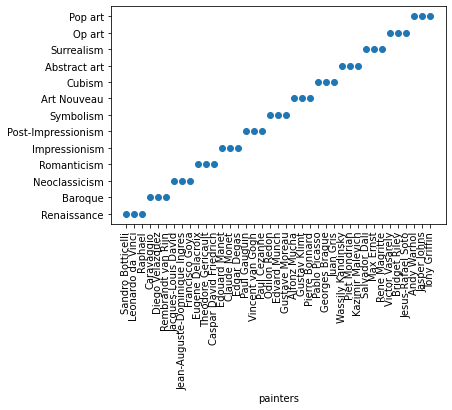

In [98]:
fig, ax = plt.subplots()
plt.scatter(x = thin_data['artist'], y = thin_data['art movement'])
ax.set_xticklabels(thin_data['artist'], rotation=90)
plt.xlabel('painters')

plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


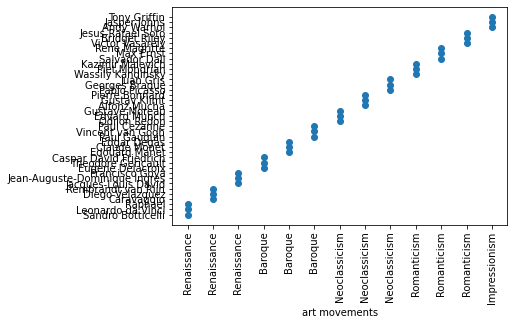

In [99]:
fig, ax = plt.subplots()
plt.scatter(x = thin_data['art movement'], y = thin_data['artist'])
ax.set_xticklabels(thin_data['art movement'], rotation=90)
plt.xlabel('art movements')

plt.show()


<class 'pandas.core.series.Series'>
art movement
Baroque                7.11
Neoclassicism          7.14
Symbolism              7.23
Abstract art           7.33
Op art                 7.33
Renaissance            7.35
Cubism                 7.79
Post-Impressionism     8.54
Romanticism            9.72
Surrealism             9.74
Art Nouveau            9.92
Pop art               10.00
Impressionism         10.26
Name: score, dtype: float64
x ------------- 
<class 'numpy.ndarray'>
13
int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KeyError: 'art movement'

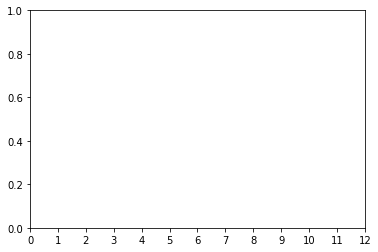

In [100]:
# Score of each category's artists

score_by_art_movement = thin_data.groupby('art movement')['score'].sum()
score_by_art_movement = score_by_art_movement.sort_values()

print(type(score_by_art_movement))
print(score_by_art_movement)



fig, ax = plt.subplots()

x = np.arange(len(score_by_art_movement))  # the label locations
ax.set_xticks(x)
print('x ------------- ')
print(type(x))
print(len(x))
print(x.dtype)

print([e for e in x])
print(score_by_art_movement.loc['art movement'])

plt.bar(x,score_by_art_movement)

plt.show()
#print(score_by_art_movement)

#plt.scatter(x = , y = thin_data['artist'])
